## Проект №3. Predict TripAdvisor Rating (Проект 3. О вкусной и здоровой пище )

### Задача: предсказать рейтинг ресторанов в TripAdvisor

In [1123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split


import re
import datetime
from datetime import datetime, timedelta
from itertools import combinations #для теста Стьюдента
from scipy.stats import ttest_ind #для теста Стьюдента
from sklearn.preprocessing import StandardScaler #для std нормализации
from sklearn.preprocessing import MinMaxScaler #для minmax нормализации
from textblob import TextBlob
import warnings; warnings.simplefilter('ignore')

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


        # Any results you write to the current directory are saved as output.

In [1124]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [1125]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

"pip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# DATA

In [1126]:
# тренировочный (train, используется для обучения модели)
df_train = pd.read_csv('main_task.csv')

# тестовый (test, используется для оценки точности модели)
df_test = pd.read_csv('kaggle_task.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [1127]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.0+ MB


In [1128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.0+ MB


In [1129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 429.8+ KB


In [1130]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [1131]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [1132]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 117.2+ KB


In [1133]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [1134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.9+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

Изначально в дейтасете у нас 10 колонок, из которых только <b>Ranking</b> и целевая переменная <b>Rating</b> числовые переменные, остальные колонки - категориальные.

In [1135]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
32705,id_5151,Madrid,['Spanish'],5154.0,NaN,5.0,"[['Awesome Tapas and Coctails', 'AVERAGE'], ['...",/Restaurant_Review-g187514-d4064945-Reviews-La...,d4064945,1,4.5
25756,id_4073,Madrid,"['Steakhouse', 'Peruvian']",4075.0,$,NaN,"[[], []]",/Restaurant_Review-g187514-d12632862-Reviews-A...,d12632862,1,5.0
2262,id_2262,Hamburg,"['Mexican', 'Latin', 'Vegetarian Friendly']",261.0,$$ - $$$,133.0,"[['Nice but old fashion', 'Big portions'], ['0...",/Restaurant_Review-g187331-d1038919-Reviews-Do...,d1038919,0,0.0
12654,id_9644,Paris,"['French', 'European']",9646.0,$$ - $$$,315.0,"[['Busy at the week end', 'quick stop over'], ...",/Restaurant_Review-g187147-d2181709-Reviews-La...,d2181709,1,3.0
19284,id_1233,Paris,"['French', 'European', 'Vegetarian Friendly', ...",1234.0,$$ - $$$,354.0,"[['Delicious and innovative dinner', 'Creative...",/Restaurant_Review-g187147-d719844-Reviews-Pom...,d719844,1,4.5


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

In [1136]:
#Функция для анализа числовых столбцов
def func_(df, col, with_bins):
    
    #Заменим на NaN если есть пустая строчка     
    df[col] = df[col].apply(lambda x: None if str(x).strip()=='' else x)
    
    display(pd.DataFrame(df[col].value_counts()))
    print("Значений, встретившихся в столбце", col, "более 10 раз:", (df[col].value_counts()>10).sum())
    print("Уникальных значений:", df[col].nunique())
    df.loc[:, [col]].info()
    
    if with_bins == 1:
    
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        axes.hist(df[col], bins = int(df[col].median()),color = 'green') 
        #axes.set_title('Общая сумма счета')
        axes.set_ylabel('Количество')
        axes.set_xlabel(col)  
        
    else: # без bins равному медиане
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 1, 1])
        axes.hist(df[col], color = 'green')        
        axes.set_ylabel('Количество')
        axes.set_xlabel(col)  

In [1137]:
#Функция для анализа квантилей и выбросов
def func_quantile(df, col):   
    
    IQR = df[col].quantile(q=0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
    # Подсчитаем количество выбросов
    print("Количество выбросов в столбце",col,":",df[df[col]<perc25 - 1.5*IQR][col].count() + df[df[col]>perc75 + 1.5*IQR][col].count())
    df[col].loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, label = 'IQR')
    plt.legend()  

In [1138]:
#Функция для заполнения выбросов ближайшим квантилем
def filling_quantile(df, col, change_quant): #quant=0.25 или 0.75
    IQR = df[col].quantile(q=0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    high_border = perc75 + 1.5*IQR
    low_border = perc25 - 1.5*IQR
    if change_quant == 0.75:
        df[col] = df[col].apply(lambda x: high_border if x>high_border else x)
    elif change_quant == 0.25:
        df[col] = df[col].apply(lambda x: low_border if x<low_border else x)
    else:
        print('Значение квантиля должно быть 0.25 или 0.75 :)')

In [1139]:
#Строим график для колонок, содержащих номинативные переменные
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='Rating', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:20])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [1140]:
def get_stat_dif_2(column):
    
    cols = data[data['sample'] == 1].loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    # Тест проводим на изначальном наборе данных без NA значений для целевого столбца, 
    # столбца с признаком, дополнительно исключив 0 для оценок
    stud_stat = data[data['sample'] == 1]
    for comb in combinations_all:
        if ttest_ind(stud_stat.loc[data[data['sample'] == 1].loc[:, column] == comb[0], 'Rating'],
                     stud_stat.loc[data[data['sample'] == 1].loc[:, column] == comb[1], 'Rating']).pvalue <= 0.05/len(combinations_all):  # учли поправку Бонферони
            # print('Найдены статистически значимые различия для колонки', column)
            pass
        else:
            return column 
            break

In [1141]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'Rating'], 
                        data.loc[data.loc[:, column] == comb[1], 'Rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
        #    break
        else:
            return column
            break

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [1142]:
#Заполняем единичкой, там где в колонке Number of Reviews нет числа отзывов
data['isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

# заполняем пропуски медианой по городу
median = data.groupby('City')['Number of Reviews'].median()
data['Number_of_Reviews'] = data[data['isNAN'] > 0].City.apply(
    lambda x: round(median.loc[x]))


In [1143]:
data['Number of Reviews'].value_counts().min()

1

In [1144]:
data['Number_of_Reviews'].value_counts().min()

21

In [1145]:
data['Number of Reviews'].fillna(0, inplace=True)
data['Number_of_Reviews'].fillna(0, inplace=True)
data['Number of Reviews'] = data['Number of Reviews'] + data['Number_of_Reviews']

#данные взяли, можно удалить
data.drop(['Number_of_Reviews'], axis = 1, inplace = True)

In [1146]:
data[data['isNAN'] ==0]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,0
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0


### 2. Обработка признаков

In [1147]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1573
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
isNAN                    2
dtype: int64

 ### Рассмотрим и проанализируем колонку Ranking

In [1148]:
#Ranking: Ранг ресторана относительно других ресторанов в этом городе

,Ranking
93.0,22
72.0,21
491.0,21
842.0,21
1013.0,20
...,...
8027.0,1
10415.0,1
14621.0,1
11766.0,1


Значений, встретившихся в столбце Ranking более 10 раз: 1269
Уникальных значений: 12975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  50000 non-null  float64
dtypes: float64(1)
memory usage: 390.7 KB


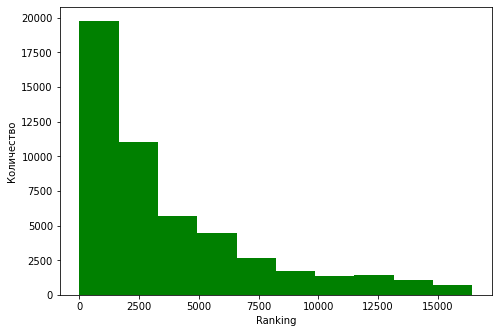

In [1149]:
func_(data,'Ranking',10)

25-й перцентиль: 972.0, 75-й перцентиль: 5241.0, IQR: 4269.0,  Границы выбросов: [-5431.5, 11644.5].
Количество выбросов в столбце Ranking : 3075


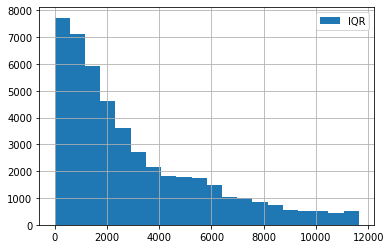

In [1150]:
func_quantile(data,'Ranking')

<AxesSubplot:xlabel='Ranking'>

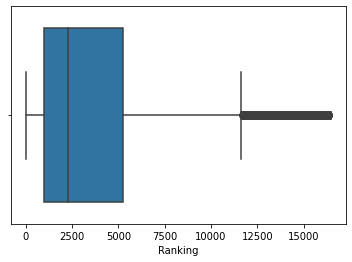

In [1151]:
sns.boxplot(x= 'Ranking', data = data)

In [1152]:
#Посмотрим на корреляцию
data.loc[:,'Rating'].astype('float64').corr(data.loc[:,'Ranking']).astype('float64')

-0.10989733543682878

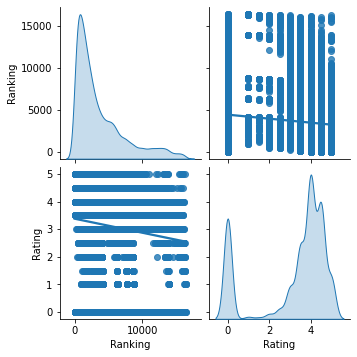

In [1153]:
sns.pairplot(data, vars = ["Ranking","Rating"], kind = 'reg',diag_kind="kde")

Зависимость слабая линейная (корреляция всего -0,1)

In [1154]:
# Заменим выбросы на ближайший квантиль Q3
#filling_quantile(data, 'Ranking',0.75)

#При замене - MAE ухудшается на 0,2. Все таки выбросы как отдельная группа в данном случае. Нельзя ее убирать. 
#Попробуем добавить группы.

In [1155]:
def func(x):
    if x > 972 and x < 5241:
        return 1
    elif x < 972:
        return 2
    else: return 3     

In [1156]:
data['Ranking_group'] = data['Ranking'].apply(func)

In [1157]:
#Посмотрим на корреляцию
data.loc[:,'Rating'].astype('float64').corr(data.loc[:,'Ranking_group']).astype('float64')

-0.054359249145753234

Корреляция стала еще ниже. 

In [1158]:
#Попробуем сделать дамми-перемнные
data = pd.get_dummies(data, columns=['Ranking_group'], dummy_na=False)
#Немного улучшился MAE

<b>Таким образом, я создала новый признак - три типа ранга ресторана относительно других ресторанов в этом городе</b>

Найдем количество ресторанов в каждом городе

In [1159]:
rest_count_in_city = data.groupby('City')['Restaurant_id'].count().reset_index()
rest_count_in_city.sort_values(by = 'Restaurant_id',ascending=False)
rest_count_in_city.rename(columns = {'Restaurant_id':'count_in_city'}, inplace = True)
rest_count_in_city

,City,count_in_city
0,Amsterdam,1372
1,Athens,776
2,Barcelona,3395
3,Berlin,2705
4,Bratislava,380
5,Brussels,1314
6,Budapest,1021
7,Copenhagen,819
8,Dublin,836
9,Edinburgh,745


<AxesSubplot:>

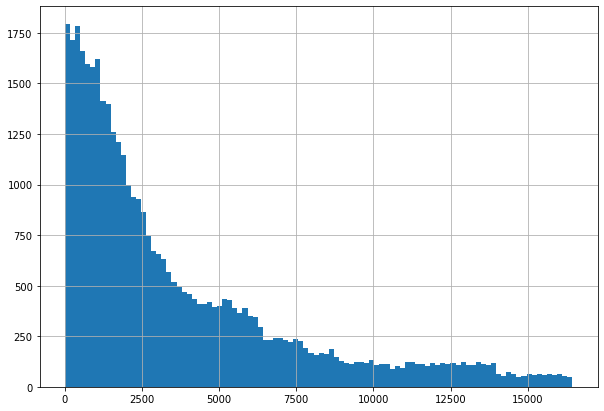

In [1160]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

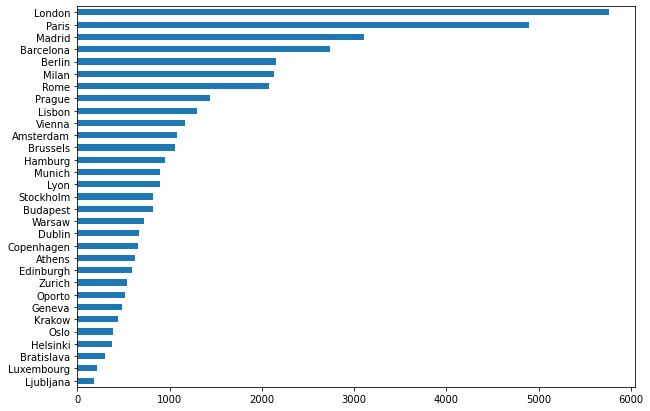

In [1161]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

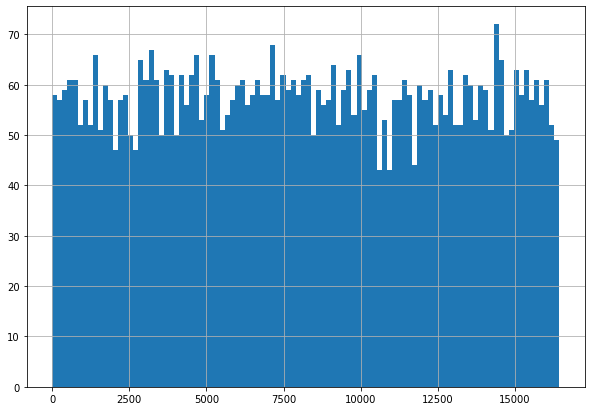

In [1162]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

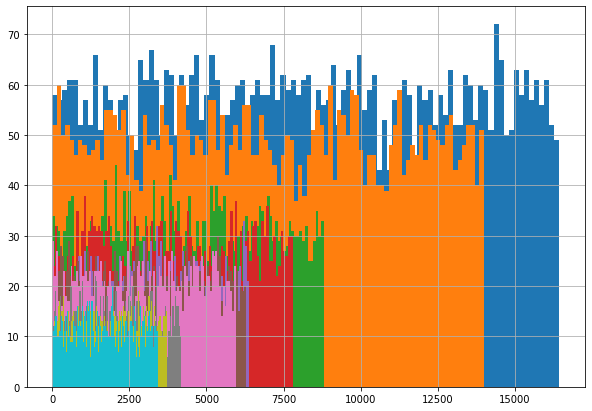

In [1163]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Попробуем приминить нормализацию


In [1164]:
data = data.merge(rest_count_in_city, on='City', how='left',sort=False)

In [1165]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,isNAN,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1,6108
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,1,0,475
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,1,0,745
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,1,0,0,7193
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,1,0,380


In [1166]:
data.loc[:,['Restaurant_id','count_in_city','Ranking']]

,Restaurant_id,count_in_city,Ranking
0,id_0,6108,12963.0
1,id_1,475,106.0
2,id_2,745,810.0
3,id_3,7193,1669.0
4,id_4,380,37.0
...,...,...,...
49995,id_499,2694,500.0
49996,id_6340,6108,6341.0
49997,id_1649,1033,1652.0
49998,id_640,925,641.0


In [1167]:
data['Ranking_norm'] = data['Ranking']/data['count_in_city']
#C ним хуже MAE, удалю потом как ненужную колонку

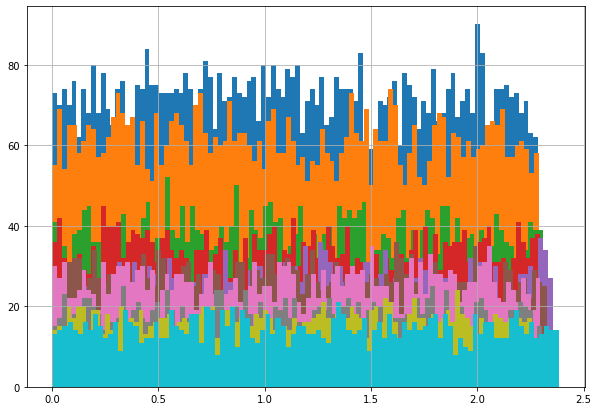

In [1168]:
# Теперь посмотрим на топ 10 городов после нормализации
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking_norm'][data['City'] == x].hist(bins=100)
plt.show()

Таким образом, мы избавились от смещения

In [1169]:
#Попробуем еще один тип нормализации(для эксперимента):

#Пробовала стандартную нормализацию, но мин макс нормализация дает лучший показатель MAE
scaler = MinMaxScaler()#StandardScaler()
Ranking_norm = scaler.fit_transform(data.loc[:,['count_in_city','Ranking']]) 
#Ranking_norm = scaler.fit_transform(data.loc[:,['Ranking']]) 
Ranking_norm

array([[0.84435519, 0.78829897],
       [0.03629321, 0.0063857 ],
       [0.0750251 , 0.04920027],
       ...,
       [0.11633912, 0.10040747],
       [0.10084636, 0.03892234],
       [0.35461196, 0.29349875]])

In [1170]:
df_norm_Ranking = pd.DataFrame(Ranking_norm,
                  columns = ['Ranking_norm_1', 'Ranking_norm_2'])

df_norm_Ranking['City']=data ['City']
df_norm_Ranking

,Ranking_norm_1,Ranking_norm_2,City
0,0.844355,0.788299,Paris
1,0.036293,0.006386,Helsinki
2,0.075025,0.049200,Edinburgh
3,1.000000,0.101441,London
4,0.022665,0.002189,Bratislava
...,...,...,...
49995,0.354612,0.030347,Milan
49996,0.844355,0.385574,Paris
49997,0.116339,0.100407,Stockholm
49998,0.100846,0.038922,Warsaw


In [1171]:
data['Ranking_norm_1'] = df_norm_Ranking['Ranking_norm_1']
data['Ranking_norm_2'] = df_norm_Ranking['Ranking_norm_2']

<b>Таким образом, я создала несколько новых признаков - Ranking_norm, Ranking_norm_1, Ranking_norm_2</b>

 ### Рассмотрим и проанализируем колонку Restaurant_id

<AxesSubplot:>

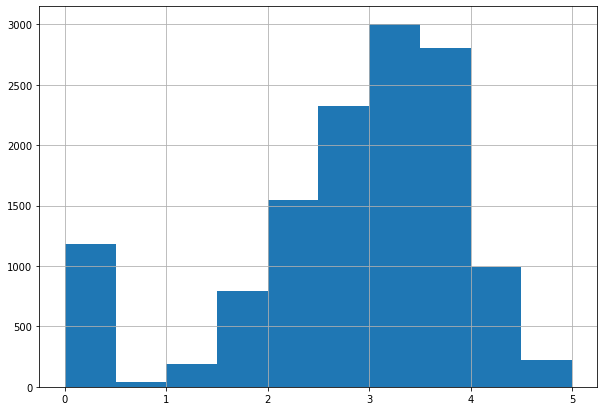

In [1172]:
data.groupby('Restaurant_id')['Rating'].mean().hist()

Мы видим,что очень большое количество ресторанов имеют рейтинг от 2 до 4 

In [1173]:
# количество номеров ресторанов повторяется, значит это не уникальные номера, а какие-то сообщества, может сетевые.
len(data['Restaurant_id'].value_counts())

13094

In [1174]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,isNAN,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city,Ranking_norm,Ranking_norm_1,Ranking_norm_2
507,id_507,Bratislava,NaN,881.0,NaN,10.0,"[[], []]",/Restaurant_Review-g274924-d4769786-Reviews-U_...,d4769786,0,0.0,1,0,1,0,380,2.318421,0.022665,0.053518
16671,id_4330,Madrid,NaN,4332.0,NaN,17.0,"[['Good for casual dining', 'Business diner'],...",/Restaurant_Review-g187514-d5615749-Reviews-Re...,d5615749,1,4.0,0,1,0,0,3813,1.136113,0.515134,0.263395
11907,id_335,Geneva,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",337.0,$$ - $$$,90.0,"[['Nice', 'Good food. Service with a smile.'],...",/Restaurant_Review-g188057-d2470755-Reviews-Zh...,d2470755,1,4.0,0,0,1,0,590,0.571186,0.052790,0.020434
45617,id_4553,London,"['Chinese', 'Asian', 'Vegetarian Friendly']",4561.0,$$ - $$$,47.0,"[['Good dinner', 'Atmosphere and sharinng'], [...",/Restaurant_Review-g186338-d11908573-Reviews-M...,d11908573,1,4.0,0,1,0,0,7193,0.634089,1.000000,0.277322
21381,id_7434,London,"['Steakhouse', 'Halal']",7443.0,$$ - $$$,27.0,"[['friendly', 'Awesome Steak Out!'], ['12/23/2...",/Restaurant_Review-g186338-d8803532-Reviews-St...,d8803532,1,4.0,0,0,0,1,7193,1.034756,1.000000,0.452594


In [1175]:
#Найдем сетевые рестораны
network = (data['Restaurant_id'].value_counts()>2).reset_index()

In [1176]:
network_list = list(network[network.Restaurant_id == True]['index'])


In [1177]:
df_network = network[network.Restaurant_id == True]

In [1178]:
df_network['chain'] = '1'

In [1179]:
df_network.rename(columns = {
                        'index':'Restaurant_id', 
                        'Restaurant_id':'True/Not', 
                         }, inplace = True)

In [1180]:
df_network

,Restaurant_id,True/Not,chain
0,id_227,True,1
1,id_871,True,1
2,id_436,True,1
3,id_633,True,1
4,id_585,True,1
...,...,...,...
6727,id_3081,True,1
6728,id_5028,True,1
6729,id_2403,True,1
6730,id_6765,True,1


In [1181]:
df_network = df_network.drop(['True/Not'], axis=1)
df_network

,Restaurant_id,chain
0,id_227,1
1,id_871,1
2,id_436,1
3,id_633,1
4,id_585,1
...,...,...
6727,id_3081,1
6728,id_5028,1
6729,id_2403,1
6730,id_6765,1


In [1182]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,isNAN,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city,Ranking_norm,Ranking_norm_1,Ranking_norm_2
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1,6108,2.122299,0.844355,0.788299
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,1,0,475,0.223158,0.036293,0.006386
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,1,0,745,1.087248,0.075025,0.049200
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,1,0,0,7193,0.232031,1.000000,0.101441
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,1,0,380,0.097368,0.022665,0.002189


In [1183]:
data = data.merge(df_network, on='Restaurant_id', how='left')
data['chain'].fillna(0, inplace=True) #где не сеть, ставим 0

In [1184]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,isNAN,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city,Ranking_norm,Ranking_norm_1,Ranking_norm_2,chain
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1,6108,2.122299,0.844355,0.788299,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,1,0,475,0.223158,0.036293,0.006386,1
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,1,0,745,1.087248,0.075025,0.049200,1
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,1,0,0,7193,0.232031,1.000000,0.101441,1
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,1,0,380,0.097368,0.022665,0.002189,1


In [1185]:
data['chain'].value_counts()

1    41083
0     8917
Name: chain, dtype: int64

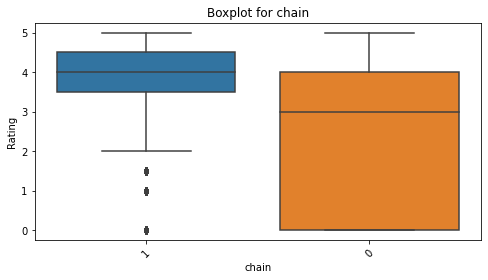

In [1186]:
get_boxplot('chain')

При сравнении boxplot видно, что у сетевых ресторанов (chain=1) Rating в среднем намного выше.

<b>Таким образом, я создала новый признак сетевого ресторана - chain</b>

 ### Рассмотрим и проанализируем колонку "Price Range"

In [1187]:
display(data['Price Range'].unique())
data['Price Range'].value_counts()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [1188]:
# признак "Price Range"
data['isNAN'] = pd.isna(data['Price Range']).astype('uint8')
price_dict = {"$$$$": 3, "$$ - $$$": 2, "$": 1} 
data['Price Range'] = data['Price Range'].replace(to_replace=price_dict)
# заполняем пропуски средним по городу
median = data.groupby('City')['Price Range'].median()
data['Price_Range'] = data[data['isNAN'] > 0].City.apply(
    lambda x: median.loc[x])
data['Price Range'].fillna(0, inplace=True)
data['Price_Range'].fillna(0, inplace=True)
data['Price Range'] = data['Price Range'] + data['Price_Range']
data.drop(['Price_Range'], axis = 1, inplace = True)

In [1189]:
display(data['Price Range'].unique())
data['Price Range'].value_counts()

array([2., 3., 1.])

2.0    40402
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

In [1190]:
# Оценка модели хуже если закодировать признак с One-Hot Encoding
#data = pd.get_dummies(data, columns=['Price Range'], dummy_na=False)

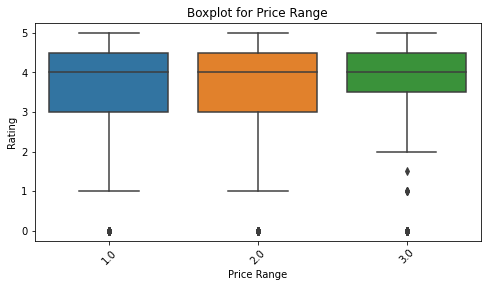

In [1191]:
get_boxplot('Price Range')

По графику видно, что рестораны с более дорогой ценовой категорией имеют рейтинг не ниже где-то 3.5. А вот первую и вторую группу можно объединить. P.S. Это не улучшило MAE, поэтому вернула категории 1 и 2

### Рассмотрим и проанализируем колонку "Number of Reviews"

In [1192]:
#Number of Reviews: Количество отзывов

In [1193]:
data['Number of Reviews'].value_counts()

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
1932.0       1
1050.0       1
1145.0       1
768.0        1
1087.0       1
Name: Number of Reviews, Length: 1573, dtype: int64

In [1194]:
#Посмотрим сколько отзывов приходится на каждый город 
Number_of_Reviews_Sum = data.groupby(['City'])['Number of Reviews'].sum().sort_values(ascending=False)
Number_of_Reviews_Sum

City
London        949920.0
Rome          737279.0
Paris         693631.0
Milan         437507.0
Barcelona     437487.0
Madrid        363611.0
Prague        203846.0
Lisbon        199788.0
Amsterdam     196988.0
Edinburgh     173573.0
Berlin        160343.0
Budapest      150430.0
Dublin        124564.0
Brussels      116308.0
Vienna        109187.0
Lyon           95409.0
Munich         84822.0
Oporto         81903.0
Copenhagen     75122.0
Stockholm      73208.0
Athens         68975.0
Krakow         68643.0
Warsaw         57268.0
Hamburg        50581.0
Zurich         47969.0
Oslo           47240.0
Geneva         35331.0
Helsinki       30099.0
Luxembourg     21272.0
Ljubljana      18569.0
Bratislava     17242.0
Name: Number of Reviews, dtype: float64

In [1195]:
Number_of_Reviews_Count = data.groupby(['City'])['Number of Reviews'].count().sort_values(ascending=False)
Number_of_Reviews_Count


City
London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: Number of Reviews, dtype: int64

In [1196]:
#Подсчитаем среднее количество отзывов на один ресторан в городе: 
med_number_of_reviews_dict = {}
for city in list(data.City.unique()):
    med_number_of_reviews_dict[city] = round(Number_of_Reviews_Sum[city]/Number_of_Reviews_Count[city])

med_number_of_reviews_dict 

{'Paris': 114,
 'Helsinki': 63,
 'Edinburgh': 233,
 'London': 132,
 'Bratislava': 45,
 'Lisbon': 121,
 'Budapest': 147,
 'Stockholm': 71,
 'Rome': 285,
 'Milan': 162,
 'Munich': 74,
 'Hamburg': 43,
 'Prague': 112,
 'Vienna': 76,
 'Dublin': 149,
 'Barcelona': 129,
 'Brussels': 89,
 'Madrid': 95,
 'Oslo': 97,
 'Amsterdam': 144,
 'Berlin': 59,
 'Lyon': 85,
 'Athens': 89,
 'Warsaw': 62,
 'Oporto': 128,
 'Krakow': 124,
 'Copenhagen': 92,
 'Luxembourg': 81,
 'Zurich': 70,
 'Geneva': 60,
 'Ljubljana': 84}

In [1197]:
# Попробую другим способом получить среднее по городу
table = Number_of_Reviews_Sum.reset_index().merge(Number_of_Reviews_Count.reset_index(), on='City', how='right')
table['city_reviews_mean'] = table['Number of Reviews_x']/table['Number of Reviews_y']
table

,City,Number of Reviews_x,Number of Reviews_y,city_reviews_mean
0,London,949920.0,7193,132.061727
1,Paris,693631.0,6108,113.561067
2,Madrid,363611.0,3813,95.360871
3,Barcelona,437487.0,3395,128.862150
4,Berlin,160343.0,2705,59.276525
5,Milan,437507.0,2694,162.400520
6,Rome,737279.0,2589,284.773658
7,Prague,203846.0,1816,112.250000
8,Lisbon,199788.0,1647,121.304189
9,Vienna,109187.0,1443,75.666667


In [1198]:
#Тоже превращаем данные в словарь (просто для тренировки)
city_reviews = table.groupby('City')['city_reviews_mean'].apply(list).to_dict()
city_reviews

{'Amsterdam': [143.57725947521865],
 'Athens': [88.88530927835052],
 'Barcelona': [128.8621502209131],
 'Berlin': [59.27652495378928],
 'Bratislava': [45.373684210526314],
 'Brussels': [88.5144596651446],
 'Budapest': [147.33594515181196],
 'Copenhagen': [91.72405372405372],
 'Dublin': [149.0],
 'Edinburgh': [232.98389261744967],
 'Geneva': [59.883050847457625],
 'Hamburg': [42.64839797639123],
 'Helsinki': [63.36631578947368],
 'Krakow': [123.9043321299639],
 'Lisbon': [121.30418943533698],
 'Ljubljana': [83.64414414414415],
 'London': [132.06172667871542],
 'Luxembourg': [80.88212927756653],
 'Lyon': [84.73268206039076],
 'Madrid': [95.36087070548125],
 'Milan': [162.40051967334819],
 'Munich': [74.08034934497816],
 'Oporto': [127.57476635514018],
 'Oslo': [96.80327868852459],
 'Paris': [113.56106745252129],
 'Prague': [112.25],
 'Rome': [284.7736577829278],
 'Stockholm': [70.86931268151017],
 'Vienna': [75.66666666666667],
 'Warsaw': [61.91135135135135],
 'Zurich': [70.0277372262773

In [1199]:
# Заменяем все нули на среднее по городу количество отзывов (по итогу это не особо поменяло MAE):
def number_of_reviews_med(row):
    if row['Number of Reviews'] == 0:
        result = med_number_of_reviews_dict[row['City']]
    else:
        result = row['Number of Reviews']
    return result

data['Number of Reviews'] = data.apply(lambda row: number_of_reviews_med(row),axis = 1)


<b>Таким образом, создан новый признак - среднее количество отзывов на один ресторан в городе Number of Reviews</b>

 ### Рассмотрим и проанализируем колонку "Cuisine Style"

In [1200]:
# Cuisine Style: Кухня
data.loc[0, 'Cuisine Style']
# В одной ячейке представлены несколько типов кухонь, которые есть в ресторане

"['Bar', 'Pub']"

In [1201]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace('[',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(']',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(' ',''))

In [1202]:
def parse_values(x):
    if 'VegetarianFriendly' in x:
           return 1
    elif 'European' in x:
           return 2
#    elif 'Mediterranean' in x:    
#           return 3
#    elif 'Italian' in x:    
#           return 4        
#    elif 'VeganOptions' in x:    
#           return 5        
#    elif 'GlutenFreeOptions' in x:    
#           return 6          
    else:
         return 3
data['Cuisine'] = data['Cuisine Style'].apply(parse_values)

In [1203]:
#Хуже MAE с разбивкой 
#data = pd.get_dummies(data, columns=[ 'Cuisine',], dummy_na=True)

In [1204]:
 #посчитаем количество представленных кухонь, если значение пустое, то кухня одна
def modify_cuisine_style(value):
    if pd.isnull(value):
        return []
    else:
        result = value.replace('[', '') 
        result = result.replace(']', '') 
        result = result.replace(', ', ',')
        return result.split(",")

data['Cuisine Style'] = data['Cuisine Style'].apply(modify_cuisine_style)
data['Cuisine_Style'] = data['Cuisine Style'].apply(lambda x: 1 if len(x)==0 else len(x))

In [1205]:
#data['Cuisine Style'].to_list()

In [1206]:
#data_exploded = data.explode('Cuisine Style')
#data_exploded['Cuisine Style'].value_counts().head(10)

In [1207]:
#data_exploded.type_of_cuisine.value_counts().head(7)

In [1208]:
#data['Cuisine'].value_counts()

In [1209]:
#Преобразуем средние значения часто встречающихся типов кухонь по конкретному городу в словарь
#City_Cuisine_dict = data.groupby('City')['Cuisine'].mean().to_dict()

In [1210]:
#Создадим новый признак (МАЕ лучше, но при submit на Kagle хуже немного значение, поэтому не буду использовать)
#data['mean_city_cuisine'] = data['City'].replace(to_replace=City_Cuisine_dict)

In [1211]:
#Посмотрим на корреляцию
#data.loc[:,'Rating'].astype('float64').corr(data.loc[:,'mean_city_cuisine']).astype('float64')

### Рассмотрим и проанализируем колонку City

In [1212]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

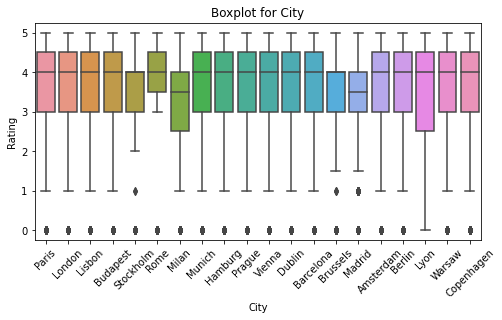

In [1213]:
get_boxplot('City')

In [1214]:
#Введём признак, является ли город столицей
capital = ['Amsterdam', 'Athens', 'Berlin', 'Bratislava', 'Brussels', 'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Helsinki',
           'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Madrid', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw']
data['Capital'] = data['City'].apply(lambda x: 1 if x in (capital) else 0)

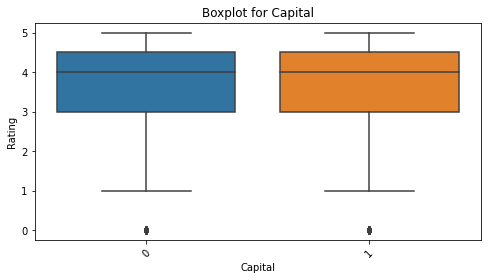

In [1215]:
get_boxplot('Capital')

К моему удивлению, признак столицы не влияет на рейтинг ресторана.

Попробую сделать из этого признака дамми-переменную.

In [1216]:
data = pd.get_dummies(data, columns=['Capital'], dummy_na=False)

Признак Capital в виде дамми-переменной положительно повлиял на показатель MAE.

<b>Таким образом, создан новый признак - столица Capital.</b>

In [1217]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

 ### Рассмотрим и проанализируем колонку "Reviews"

In [1218]:
#Reviews: 2 последних отзыва и даты этих отзывов

In [1219]:
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace('[',''))
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace(']',''))
data['Reviews'] = data['Reviews'].apply(lambda x: str(x).replace(' ',''))

In [1220]:
# Создаем столбец Review_Dates содержащий список дат отзывов:
pattern = re.compile('\d+\/\d+\/\d+')
data['Review_Date'] = data.Reviews.apply(pattern.findall)

In [1221]:
# Смотрим сколько всего бывает дат:
data['Number_of_Date'] = data.Review_Date.apply(lambda x: len(list(x)))
data.Number_of_Date.value_counts()

2    36202
0     8114
1     5680
3        4
Name: Number_of_Date, dtype: int64

In [1222]:
#Видим, что первая дата прописана в отзыве 

In [1223]:
# Убираем даты упоминаемые из комментариях отзывов:
data.Review_Date = data.Review_Date.apply(lambda x: [x[-2], x[-1]] if len(x) > 2 else x)

# Проверяем, что получилось:
data['Number_of_Date'] = data.Review_Date.apply(lambda x: len(list(x))) 
data.Number_of_Date.value_counts() 

2    36206
0     8114
1     5680
Name: Number_of_Date, dtype: int64

In [1224]:
# Разносим даты по 2-м новым столбцам, так чтобы в столбце Date_Rev_1 была бОльшая дата
# и переводим их в формат datetime:

def date_rev_1_func(x):
    if len(x) == 0:
        result = None
    elif len(x) == 1:
        result = x[0]
    else: 
        result = max(x)
    return result

In [1225]:
def date_rev_2_func(x):
    if len(x) == 0:
        result = None
    elif len(x) == 1:
        result = x[0]
    else:
        result = min(x)
    return result

In [1226]:
data['Date_Rev_1'] = pd.to_datetime(data.Review_Date.apply(lambda x: date_rev_1_func(x)))
data['Date_Rev_2'] = pd.to_datetime(data.Review_Date.apply(lambda x: date_rev_2_func(x)))

In [1227]:
# Cмотрим разницу между датами 2-х отзывов и ее макcимальное значение:
data['Date_Rev_delta'] = (data.Date_Rev_1 - data.Date_Rev_2)/ np.timedelta64(1, "D")

x = list(data['Date_Rev_delta'].unique()) 
x.sort()
print(x[-1])

3296.0


In [1228]:
# Создаем колонку с количеством дней, отделяющих последний отзыв от date_max:

# Находим максимальную дату отзыва в датасете:
date_max = data['Date_Rev_1'].max()
display(date_max)

# Заполняем колонку:
data['Date_Rev_From_Max'] = data.apply(lambda row: None if len(row.Review_Date) == 0  
                                       else ((date_max-row.Date_Rev_1)), axis=1) / np.timedelta64(1, "D")  

# Находим максимальное значение в колонке:
bad_date = data['Date_Rev_From_Max'].max()

# Заполняем пропуски максимальным значением в колонке:
data.Date_Rev_From_Max.fillna(bad_date, inplace = True)

Timestamp('2018-02-26 00:00:00')

<b>Таким образом, создала признак Date_Rev_From_Max</b>

Попробуем воспользоваться библиотекой TextBlob для оценки отзывов

In [1229]:
data['Review_1'] = data['Reviews'].apply(lambda x: TextBlob(x).polarity)

In [1230]:
data['Review_1'].value_counts().head(10)

 0.00    46545
 1.00     1122
 0.50      427
 0.70      176
-1.00      159
 0.60      126
-0.15      121
 0.60      120
 0.40      112
 0.80      102
Name: Review_1, dtype: int64

Слишком много нейтральных отзывов. Значений 0 - 46 тысяч. Смысла не имеет использовать.

 ### Рассмотрим и проанализируем колонку "ID_TA"

In [1231]:
#ID_TA: ID ресторана в TripAdvisor

In [1232]:
df_ID_TA = data.ID_TA.value_counts()[:].reset_index()
df_ID_TA[df_ID_TA.ID_TA ==2]

,index,ID_TA
0,d11999956,2
1,d3685055,2
2,d12488993,2
3,d8753348,2
4,d1315077,2
5,d9877640,2
6,d11921719,2
7,d3161682,2
8,d13002276,2
9,d11674463,2


Видим, что номера имеют разную длину. Посмотрим какими они бывают.

In [1233]:
data['ID_TA_type'] = data['ID_TA'].apply(lambda x: len(x))

<AxesSubplot:>

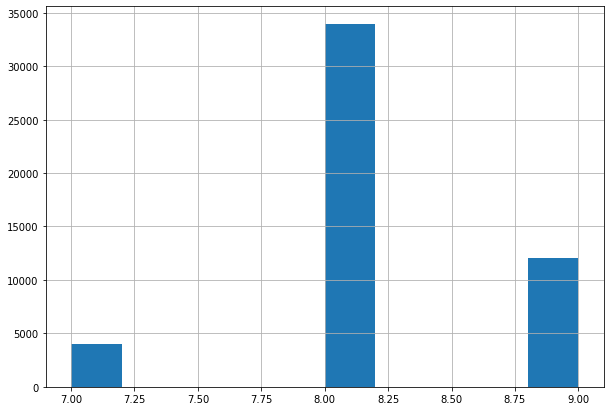

In [1234]:
data['ID_TA_type'].hist()

In [1235]:
Rating_median_ID_TA_type = data.groupby('ID_TA_type')['Rating'].mean()
Rating_median_ID_TA_type

ID_TA_type
7    3.146266
8    3.150534
9    3.334108
Name: Rating, dtype: float64

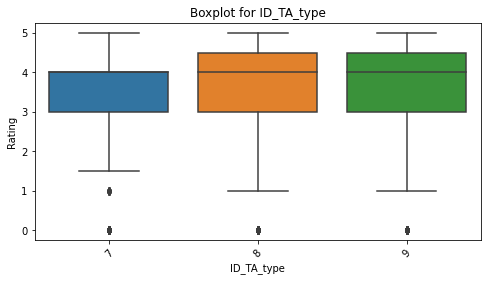

In [1236]:
for i in ['ID_TA_type']:
    get_boxplot(i)

Видно, что у номеров длиной 8 и 9, рейтинг немного выше.

In [1237]:
#объединим номера с длиной 8 и 9 в одну группу, а с длиной 7 - в другую.
def len_ID_TA(x):
    if x == 8 or x == 9:
        return 1
    else: return 0  

In [1238]:
data['type_ID_TA2'] = data['ID_TA_type'].apply(len_ID_TA)

In [1239]:
#data = pd.get_dummies(data, columns=['type_ID_TA2'], dummy_na=False)
#так хуже MAE становится

<b>Таким образом, создала признаки, основывающиеся на длине ID ресторана в TripAdvisor - ID_TA_type и type_ID_TA2</b> 

<b>Оставляя оба признака MAE улучшается</b>

### Посмотрим распределение целевой переменной

<AxesSubplot:>

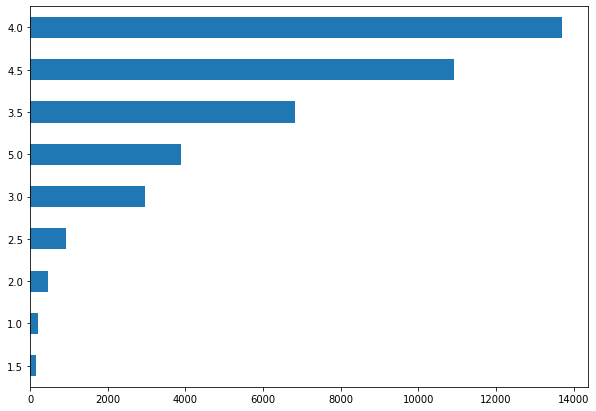

In [1240]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

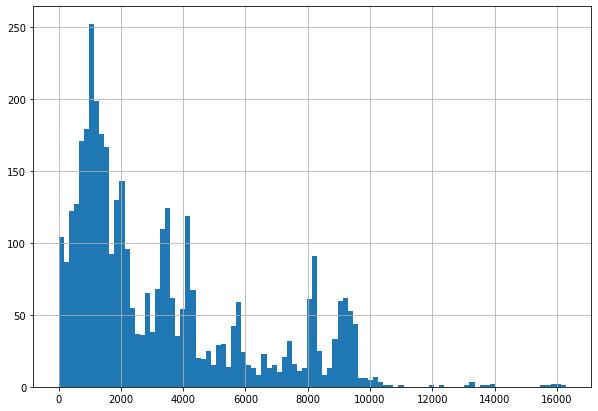

In [1241]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

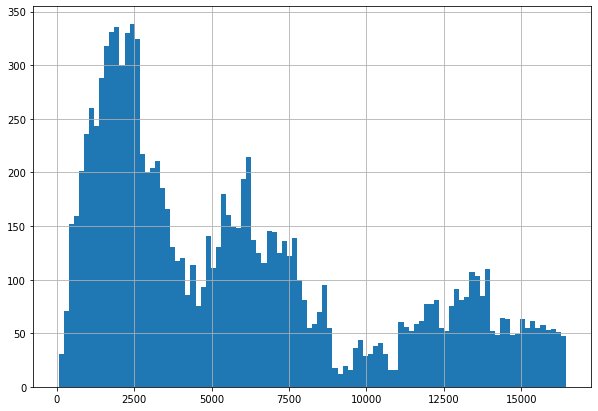

In [1242]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

## Создание полиномиальных признаков

In [1243]:
from sklearn.preprocessing import PolynomialFeatures

In [1244]:
#Опытным путем нашла, что увеличение показателя MAE идет при использовании двух признаков:'Ranking', 'Number of Reviews'
pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(data[['Ranking', 'Number of Reviews']])#Price Range
poly_features

array([[1.00000000e+00, 1.29630000e+04, 4.00000000e+00, 1.68039369e+08,
        5.18520000e+04, 1.60000000e+01],
       [1.00000000e+00, 1.06000000e+02, 9.70000000e+01, 1.12360000e+04,
        1.02820000e+04, 9.40900000e+03],
       [1.00000000e+00, 8.10000000e+02, 2.80000000e+01, 6.56100000e+05,
        2.26800000e+04, 7.84000000e+02],
       ...,
       [1.00000000e+00, 1.65200000e+03, 4.00000000e+00, 2.72910400e+06,
        6.60800000e+03, 1.60000000e+01],
       [1.00000000e+00, 6.41000000e+02, 7.00000000e+01, 4.10881000e+05,
        4.48700000e+04, 4.90000000e+03],
       [1.00000000e+00, 4.82700000e+03, 2.60000000e+02, 2.32999290e+07,
        1.25502000e+06, 6.76000000e+04]])

In [1245]:
df = pd.DataFrame(poly_features,
                  columns = ['poly1', 'poly2', 'poly3','poly4','poly5','poly6']                  )
display(df)

,poly1,poly2,poly3,poly4,poly5,poly6
0,1.0,12963.0,4.0,168039369.0,51852.0,16.0
1,1.0,106.0,97.0,11236.0,10282.0,9409.0
2,1.0,810.0,28.0,656100.0,22680.0,784.0
3,1.0,1669.0,202.0,2785561.0,337138.0,40804.0
4,1.0,37.0,162.0,1369.0,5994.0,26244.0
...,...,...,...,...,...,...
49995,1.0,500.0,79.0,250000.0,39500.0,6241.0
49996,1.0,6341.0,542.0,40208281.0,3436822.0,293764.0
49997,1.0,1652.0,4.0,2729104.0,6608.0,16.0
49998,1.0,641.0,70.0,410881.0,44870.0,4900.0


In [1246]:
#data['1'] =df['1']+df['2']+df['3']+df['4']+df['5']+df['6']
data['poly1'] =df['poly1']
data['poly2'] =df['poly2']
data['poly3'] =df['poly3']
data['poly4'] =df['poly4']
data['poly5'] =df['poly5']
#data['poly6'] =df['poly6'] Не найден как статистически значимый, убрала

На этом графике видим, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

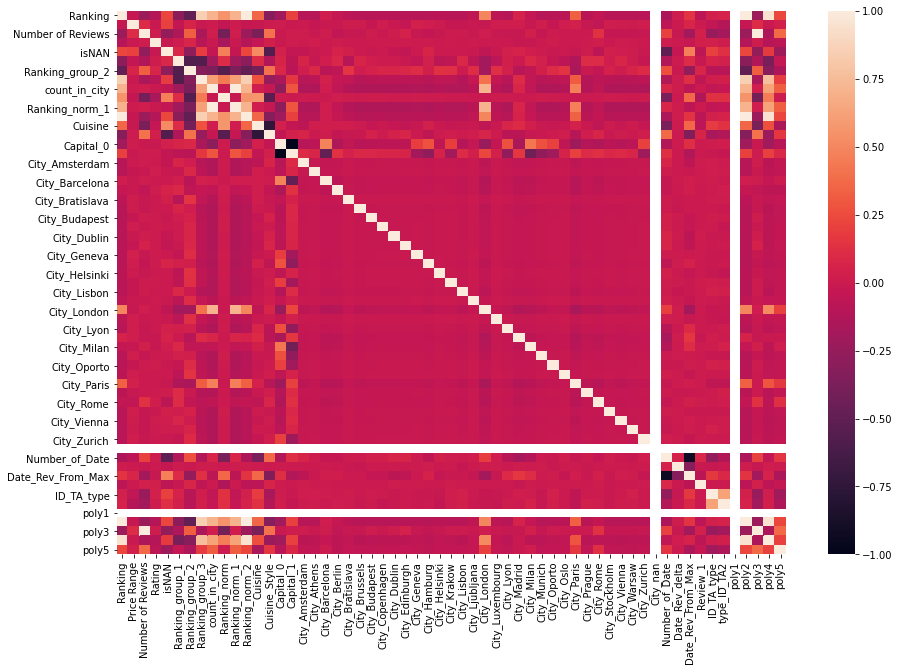

In [1247]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [1249]:
for col in ['Restaurant_id', 'Reviews', 'URL_TA', 'ID_TA', 'City_Amsterdam',  'City_Athens',  'City_Barcelona', 'City_Berlin',  
                'City_Bratislava',  'City_Brussels',  'City_Budapest',  'City_Copenhagen',  
                'City_Dublin',  'City_Edinburgh',  'City_Geneva',  'City_Hamburg',  
                'City_Helsinki', 'City_Krakow',  'City_Lisbon',  'City_Ljubljana',  
                'City_London',  'City_Luxembourg',  'City_Lyon',  'City_Madrid',  'City_Milan',  
                'City_Munich',  'City_Oporto',  'City_Oslo',  'City_Paris', 'City_Prague',  
                'City_Rome',  'City_Stockholm',  'City_Vienna',  'City_Warsaw',  'City_Zurich',  
                'City_nan','poly1','poly2','poly3','poly4','poly5','Ranking_norm_1','Ranking_norm_2','Ranking_norm',
                'Ranking','Capital_0','Capital_1']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки ID_TA
Найдены статистически значимые различия для колонки City_Athens
Найдены статистически значимые различия для колонки City_Berlin
Найдены статистически значимые различия для колонки City_Madrid
Найдены статистически значимые различия для колонки City_Milan
Найдены статистически значимые различия для колонки City_Oporto
Найдены статистически значимые различия для колонки City_Rome
Найдены статистически значимые различия для колонки City_Stockholm
Найдены статистически значимые различия для колонки City_Vienna
Найдены статистически значимые различия для колонки Capital_0
Найдены статистически значимые различия для колонки Capital_1


# Data Preprocessing

In [1250]:
# Проверяю порядок Restaurant_id
data.head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Date_Rev_delta,Date_Rev_From_Max,Review_1,ID_TA_type,type_ID_TA2,poly1,poly2,poly3,poly4,poly5
0,id_0,"['Bar', 'Pub']",12963.0,2.0,4.0,",",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,NaN,5059.0,0.0,9,1,1.0,12963.0,4.0,168039369.0,51852.0
1,id_1,"['European', 'Scandinavian', 'GlutenFreeOption...",106.0,2.0,97.0,"'Verygoodreviews!','FinedininginHakaniemi','12...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,37.0,83.0,0.0,8,1,1.0,106.0,97.0,11236.0,10282.0
2,id_2,['VegetarianFriendly'],810.0,2.0,28.0,"'BetterthantheLinks','IvyBlack','12/28/2017','...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,22.0,60.0,0.0,9,1,1.0,810.0,28.0,656100.0,22680.0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"'Mostexquisite','Deliciousandauthentic','12/06...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,14.0,82.0,0.0,7,0,1.0,1669.0,202.0,2785561.0,337138.0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"'Alwaysthebestinbratislava','Verygoodbutpricey...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,15.0,18.0,0.0,8,1,1.0,37.0,162.0,1369.0,5994.0


In [1251]:
#Пробовала оставить только статистически значимые колонки, но показатель MAE резко ухудшался.
#df_preproc = pd.DataFrame()

In [1252]:
df_preproc = data.copy()
df_preproc = df_preproc.drop(['Restaurant_id', 'Cuisine Style', 'Reviews', 'Review_Date', 
                              'Number_of_Date', 'Date_Rev_1', 'Date_Rev_2', 'Date_Rev_delta', 
                              'isNAN','URL_TA','ID_TA','Cuisine','Review_1','Ranking','Ranking_norm'], axis=1)

#df_preproc['City_Athens'] = data['City_Athens']
#df_preproc['City_Berlin'] = data['City_Berlin']
#df_preproc['City_Madrid'] = data['City_Madrid']
#df_preproc['City_Milan'] = data['City_Milan']
#df_preproc['City_Oporto'] = data['City_Oporto']
#df_preproc['City_Rome'] = data['City_Rome']
#df_preproc['City_Stockholm'] = data['City_Stockholm']
#df_preproc['City_Vienna'] = data['City_Vienna']
#df_preproc['Price Range'] = data['Price Range']
#df_preproc['poly2'] = data['poly2']
#df_preproc['poly3'] = data['poly3']
#df_preproc['poly4'] = data['poly4']
#df_preproc['poly5'] = data['poly5']
#df_preproc['mean_city_cuisine'] = data['mean_city_cuisine']
#df_preproc['Cuisine_Style'] = data['Cuisine_Style']
#df_preproc['Number of Reviews'] = data['Number of Reviews']
#df_preproc['Ranking'] = data['Ranking']
#df_preproc['Ranking_norm_1'] = data['Ranking_norm_1']
#df_preproc['Ranking_norm_2'] = data['Ranking_norm_2']
#df_preproc['count_in_city'] = data['count_in_city']
#df_preproc['Date_Rev_From_Max'] = data['Date_Rev_From_Max']
#df_preproc['sample'] = data['sample']
#df_preproc['ID_TA_type'] = data['ID_TA_type']
#df_preproc['Rating'] = data['Rating']


#'URL_TA', 'ID_TA'
#'City_Helsinki', 'City_Hamburg', 'City_Bratislava', 'City_Geneva', 'City_Zurich', 'City_Copenhagen', 'City_Luxembourg'
#df_preproc = df_preproc.drop(['City'], axis=1)

# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [1253]:
df_preproc.head()

,Price Range,Number of Reviews,sample,Rating,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city,Ranking_norm_1,Ranking_norm_2,...,City_Zurich,City_nan,Date_Rev_From_Max,ID_TA_type,type_ID_TA2,poly1,poly2,poly3,poly4,poly5
0,2.0,4.0,0,0.0,0,0,1,6108,0.844355,0.788299,...,0,0,5059.0,9,1,1.0,12963.0,4.0,168039369.0,51852.0
1,2.0,97.0,0,0.0,0,1,0,475,0.036293,0.006386,...,0,0,83.0,8,1,1.0,106.0,97.0,11236.0,10282.0
2,2.0,28.0,0,0.0,0,1,0,745,0.075025,0.049200,...,0,0,60.0,9,1,1.0,810.0,28.0,656100.0,22680.0
3,3.0,202.0,0,0.0,1,0,0,7193,1.000000,0.101441,...,0,0,82.0,7,0,1.0,1669.0,202.0,2785561.0,337138.0
4,3.0,162.0,0,0.0,0,1,0,380,0.022665,0.002189,...,0,0,18.0,8,1,1.0,37.0,162.0,1369.0,5994.0


In [1254]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price Range        50000 non-null  float64
 1   Number of Reviews  50000 non-null  float64
 2   sample             50000 non-null  int64  
 3   Rating             50000 non-null  float64
 4   Ranking_group_1    50000 non-null  uint8  
 5   Ranking_group_2    50000 non-null  uint8  
 6   Ranking_group_3    50000 non-null  uint8  
 7   count_in_city      50000 non-null  int64  
 8   Ranking_norm_1     50000 non-null  float64
 9   Ranking_norm_2     50000 non-null  float64
 10  chain              50000 non-null  object 
 11  Cuisine_Style      50000 non-null  int64  
 12  Capital_0          50000 non-null  uint8  
 13  Capital_1          50000 non-null  uint8  
 14  City_Amsterdam     50000 non-null  uint8  
 15  City_Athens        50000 non-null  uint8  
 16  City_Barcelona     500

In [1255]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [1256]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 53), (40000, 53), (40000, 52), (32000, 52), (8000, 52))

# Model 
Сам ML

In [1257]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1258]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [1259]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1260]:
# Так как признак рейтинга имеет шаг 0.5, округляем предсказание.
y_pred = np.round(y_pred * 2) / 2

In [1261]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.174875


In [1262]:
#MAE: 0.18075
#MAE: 0.1769375
#MAE: 0.176625
#MAE: 0.1755
#MAE: 0.1750625
#MAE: 0.174625
#MAE: 0.172875
#MAE: 0.176875
#MAE: 0.176125
#MAE: 0.1750625
#MAE: 0.174875

In [ ]:
#Kaggle после Submit 0.18625 место 223 (MAE перед submit: 0.1805)
#Kaggle после Submit 0.18620 место 222 (MAE перед submit: 0.1769375)
#Kaggle после Submit 0.18250 место 198 (MAE перед submit:)
#Kaggle после Submit 0.18410 (MAE перед submit: 0.172875)

<AxesSubplot:>

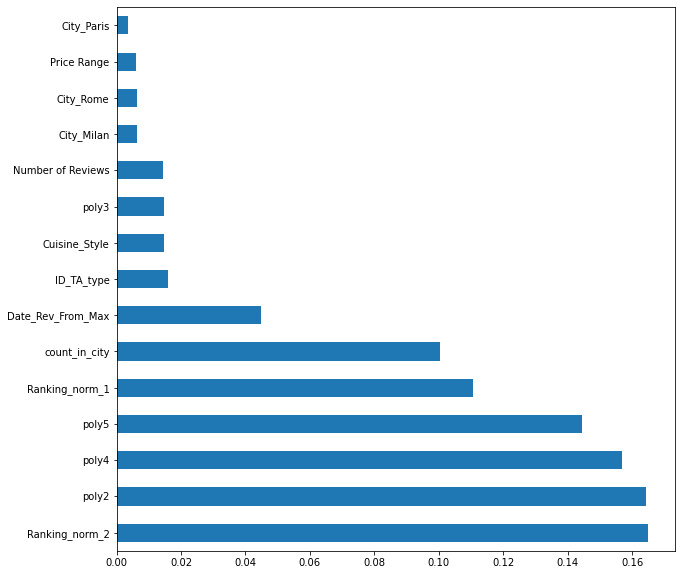

In [1263]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [1264]:
feat_importances.nlargest(15)

Ranking_norm_2       0.164915
poly2                0.164298
poly4                0.156997
poly5                0.144546
Ranking_norm_1       0.110733
count_in_city        0.100406
Date_Rev_From_Max    0.044915
ID_TA_type           0.016079
Cuisine_Style        0.014797
poly3                0.014749
Number of Reviews    0.014419
City_Milan           0.006274
City_Rome            0.006192
Price Range          0.006096
City_Paris           0.003684
dtype: float64

# Submission

In [1265]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,Ranking_group_1,Ranking_group_2,Ranking_group_3,count_in_city,Ranking_norm_1,Ranking_norm_2,chain,...,City_Zurich,City_nan,Date_Rev_From_Max,ID_TA_type,type_ID_TA2,poly1,poly2,poly3,poly4,poly5
2264,1.0,24.0,0.0,1,0,0,1021,0.114618,0.114517,1,...,0,0,5059.0,9,1,1.0,1884.0,24.0,3549456.0,45216.0
5193,2.0,41.0,0.0,0,1,0,685,0.066418,0.051207,1,...,1,0,229.0,8,1,1.0,843.0,41.0,710649.0,34563.0
6182,2.0,22.0,0.0,1,0,0,776,0.079472,0.099191,1,...,0,0,58.0,9,1,1.0,1632.0,22.0,2663424.0,35904.0
8101,3.0,86.0,0.0,1,0,0,3813,0.515134,0.102658,0,...,0,0,711.0,8,1,1.0,1689.0,86.0,2852721.0,145254.0
7810,2.0,8.0,0.0,1,0,0,3395,0.455171,0.176914,0,...,0,0,236.0,9,1,1.0,2910.0,8.0,8468100.0,23280.0
4883,2.0,7.0,0.0,1,0,0,836,0.088079,0.098826,1,...,0,0,534.0,8,1,1.0,1626.0,7.0,2643876.0,11382.0
890,1.0,535.0,0.0,1,0,0,2694,0.354612,0.112449,1,...,0,0,203.0,8,1,1.0,1850.0,535.0,3422500.0,989750.0
7268,2.0,36.0,0.0,0,1,0,776,0.079472,0.040625,0,...,0,0,204.0,8,1,1.0,669.0,36.0,447561.0,24084.0
2543,2.0,28.0,0.0,0,0,1,6108,0.844355,0.764155,1,...,0,0,480.0,8,1,1.0,12566.0,28.0,157904356.0,351848.0
5909,2.0,31.0,0.0,1,0,0,1314,0.156649,0.074865,0,...,0,0,137.0,8,1,1.0,1232.0,31.0,1517824.0,38192.0


In [1266]:
test_data = test_data.drop(['Rating'], axis=1)

In [1267]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [1268]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1269]:
predict_submission

array([3.135, 4.085, 4.46 , ..., 3.085, 4.495, 4.215])

In [1270]:
sample_submission['Rating'] = np.round(predict_submission * 2) / 2
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5


# Вывод
Я улучшила показатель MAE (повысила точность прогнозов, которые делает модель) с помощью более тщательной подготовки данных. При подготовке датасета избавилась от пропущенных значений и нечисловых признаков, а также сгенерировала новые признаки на основе информации, уже содержащейся в данных.

MAE: 0.174875